# Image Processing in OpenCV

### 1.4.1 Changing Colorspaces
<h4>
    <ul>
        <li>In this tutorial, you will learn how to convert images from one color-space to anothoe, like BGR&lt;--&gt;Gray, BGR&lt;--&gt;HSV etc.</li>
        <li>In addition to that, we will create an application which extracts a colored object in a video</li>
        <li>You will learn following functions : cv2.cvtColor(), cv2.inRange() etc.</li>
    </ul>
    
</h4>

### Changing Color-space

In [4]:
import cv2
flags = [i for i in dir(cv2) if i.startswith ('COLOR_')]
print (flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [5]:
import cv2
import numpy as np

cap = cv2.VideoCapture (0)

while (1) :
    # Take each frame
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor (frame, cv2.COLOR_BGR2HSV)
    
    # Define range of blue color in HSV
    lower_blue = np.array ([110, 50, 50])
    upper_blue = np.array ([130, 255, 255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange (hsv, lower_blue, upper_blue)
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and (frame, frame, mask=mask)
    
    cv2.imshow ('frame', frame)
    cv2.imshow ('mask', mask)
    cv2.imshow ('res', res)
    k = cv2.waitKey (5) & 0xFF
    if (k == 27) :
        break
        
cv2.destroyAllWindows()

In [6]:
green = np.uint8 ([[[0, 255, 0]]])
hsv_green = cv2.cvtColor (green, cv2.COLOR_BGR2HSV)
print (hsv_green)

[[[ 60 255 255]]]


#### Exercises
#### Try to find a way to extract more than one colored objects, for eg, extract red, blue, green objects simultaneously.

In [12]:
import cv2
import numpy as np

cap = cv2.VideoCapture (0)

while (1) :
    # Take each frame
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor (frame, cv2.COLOR_BGR2HSV)
    
    # Define range of blue color in HSV
    lower_red = np.array ([160, 50, 50])
    upper_red = np.array ([180, 255, 255])
    
    lower_green = np.array ([15, 50, 50])
    upper_green = np.array ([35, 255, 255])
    
    lower_blue = np.array ([110, 50, 50])
    upper_blue = np.array ([130, 255, 255])
    
    # Threshold the HSV image to get only blue colors
    mask_red = cv2.inRange (hsv, lower_red, upper_red)
    mask_green = cv2.inRange (hsv, lower_green, upper_green)
    mask_blue = cv2.inRange (hsv, lower_blue, upper_blue)
    
    # Bitwise-AND mask and original image
    res_red = cv2.bitwise_and (frame, frame, mask=mask_red)
    res_green = cv2.bitwise_and (frame, frame, mask=mask_green)
    res_blue = cv2.bitwise_and (frame, frame, mask=mask_blue)
    
    res = cv2.add (res_red, res_green, res_blue)
    
    cv2.imshow ('frame', frame)
    cv2.imshow ('mask_r', mask_red)
    cv2.imshow ('mask_g', mask_green)
    cv2.imshow ('mask_b', mask_blue)
    cv2.imshow ('res', res)
    k = cv2.waitKey (5) & 0xFF
    if (k == 27) :
        break
        
cv2.destroyAllWindows()

## 1.4.3 Geometric Transformations of Images
### Goals
<h4>
    <ul>
        <li>Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.</li>
        <li>You will see these functions : cv2.getPerspectiveTransform</li>
    </ul>
    </h4>

#### Scaling

In [23]:
import cv2
import numpy as np

img = cv2.imread ('sIMG_2180.jpg')

res = cv2.resize (img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

# OR

height, width = img.shape [:2]
res2 = cv2.resize (img, (2*width, 2*height), interpolation = cv2.INTER_CUBIC)

while (1) :
    cv2.imshow ('img', img)
    cv2.imshow ('res', res)
    cv2.imshow ('res2', res2)
    
    k =cv2.waitKey (1) & 0xFF
    if (k == 27) :
        break
        
cv2.destroyAllWindows()


#### Translation

In [27]:
import cv2
import numpy as np

img = cv2.imread ('sIMG_2180.jpg', 0)
rows, cols = img.shape

M = np.float32 ([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine (img, M, (cols, rows))

cv2.imshow ('img', dst)
cv2.waitKey (0)
cv2.destroyAllWindows ()

#### Rotation

In [29]:
import cv2
import numpy as np

img = cv2.imread ('sIMG_2164.jpg', 0)
rows, cols = img.shape

M = cv2.getRotationMatrix2D ((cols/2, rows/2), 90, 1)
dst = cv2.warpAffine (img, M, (cols, rows))

cv2.imshow ('img', dst)
cv2.waitKey (0)
cv2.destroyAllWindows ()

#### Affine Transformaion

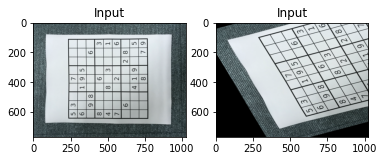

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread ('sIMG_2164.jpg')
rows, cols, ch = img.shape

pts1 = np.float32 ([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32 ([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform (pts1, pts2)

dst = cv2.warpAffine (img, M, (cols, rows))

plt.subplot (121), plt.imshow (img), plt.title('Input')
plt.subplot (122), plt.imshow (dst), plt.title('Input')
plt.show()

#### Perspective Tranformation

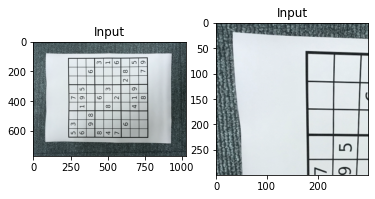

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread ('sIMG_2164.jpg')
rows, cols, ch = img.shape

pts1 = np.float32 ([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32 ([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform (pts1, pts2)

dst = cv2.warpPerspective (img, M, (300, 300))

plt.subplot (121), plt.imshow (img), plt.title ('Input')
plt.subplot (122), plt.imshow (dst), plt.title('Input')
plt.show()